## Learning to rank with LambdaMART

In this notebook we apply the LambdaMART, a pairwise learning to rank method, to a text search data set. We use the XGBoost implementation of LambdaMART. 

In [1]:
import numpy as np
import pickle
import xgboost as xgb
import graphviz
import matplotlib

## Data

The data we use is the Microsoft MSLR-10K dataset, and can be downloaded [here](https://www.microsoft.com/en-us/research/project/mslr/).

The data is a LETOR data set, of the form: "reference lable (ie ranking given by human), query id, query-url pairs (length 136 feature vec)".

The data has been pre-processed by a bash script. 

In [2]:
training_data = xgb.DMatrix('../LearningToRank/MSLR-WEB10K/Fold1/train_dat.txt')
testing_data = xgb.DMatrix('../LearningToRank/MSLR-WEB10K/Fold1/test_dat.txt')

[16:23:00] 723412x137 matrix with 98384032 entries loaded from ../LearningToRank/MSLR-WEB10K/Fold1/train_dat.txt
[16:23:00] 6000 groups are loaded from ../LearningToRank/MSLR-WEB10K/Fold1/train_dat.txt.group
[16:23:01] 241521x137 matrix with 32846856 entries loaded from ../LearningToRank/MSLR-WEB10K/Fold1/test_dat.txt
[16:23:01] 2000 groups are loaded from ../LearningToRank/MSLR-WEB10K/Fold1/test_dat.txt.group


## Building a Model

We now set the model parameters:

'max_depth' = number of layers in the tree
'eta' = step shrinkage size, used to prevent overfitting
'silent' = if 1, doesn't print updates. 
'objective' = which method is used/which objective function is minimised. 'rank:pairwise' implements LambdaMART.
'num_round' = number of boosting rounds. 

In [20]:
param = {'max_depth':6, 'eta':0.3, 'silent':0, 'objective':'rank:pairwise', 'num_round':10}


In [21]:
model = xgb.train(param, training_data)

[16:46:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:46:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:46:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:46:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:46:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:47:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:47:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:47:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:47:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned no

## Visualising the model

In [5]:
%matplotlib inline

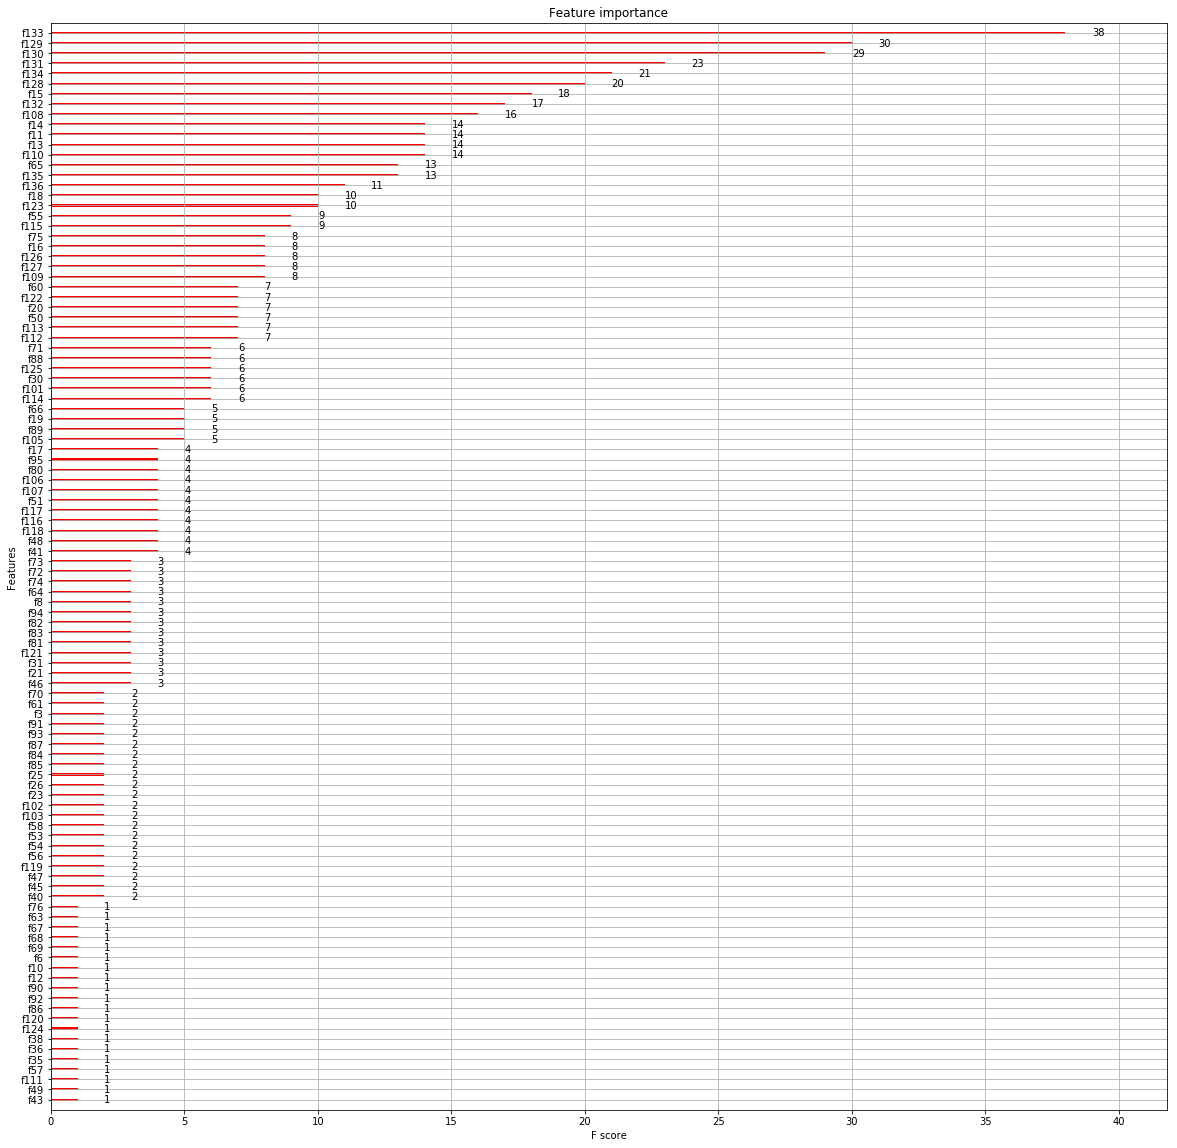

In [8]:
ax = xgb.plot_importance(model, color='red')
fig = ax.figure
fig.set_size_inches(20, 20)

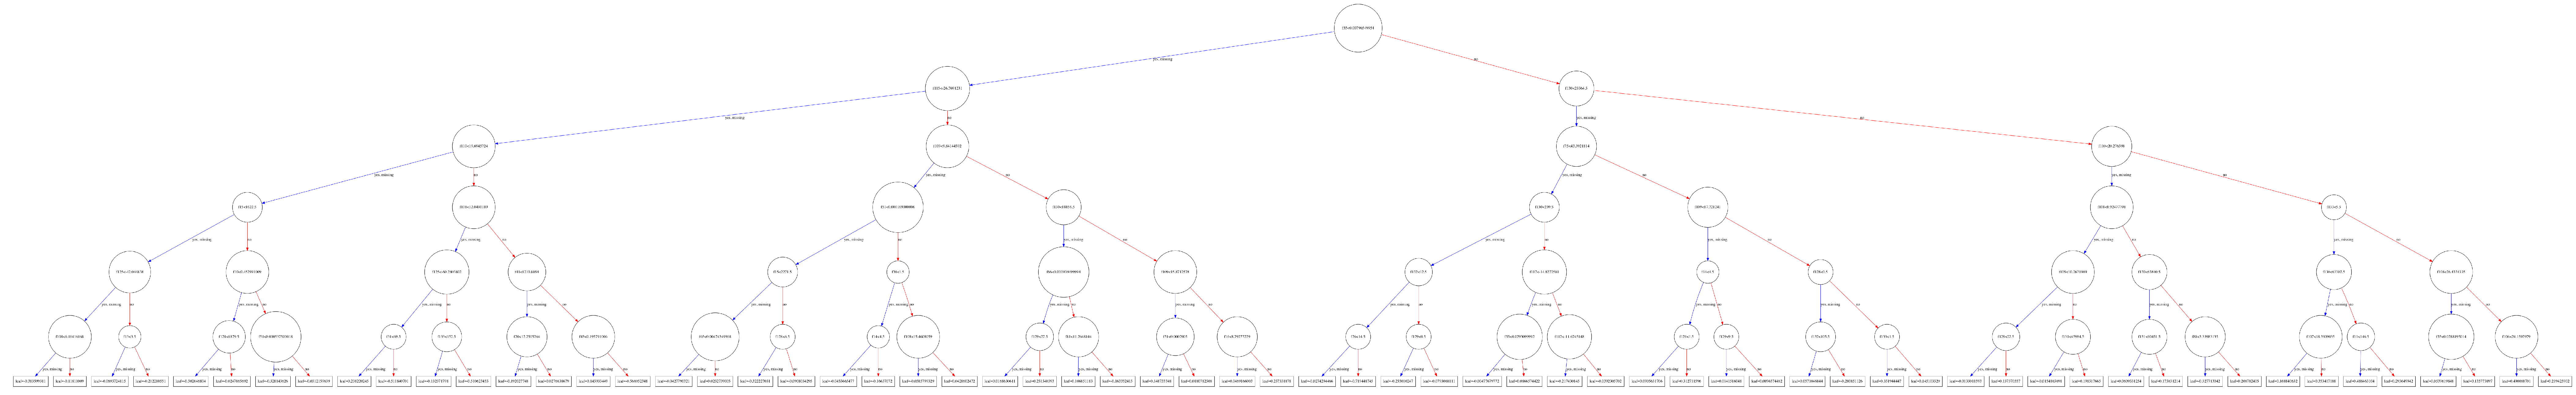

In [15]:
xgb.plot_tree(model, num_trees=3)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

## Making predictions

In [17]:
preds = model.predict(testing_data)

In [18]:
preds

array([ 0.59838194, -0.02024359, -0.25005698, ...,  1.1006238 ,
       -0.19308466, -0.19217467], dtype=float32)